In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install contractions

ERROR: Could not find a version that satisfies the requirement contractions (from versions: none)
ERROR: No matching distribution found for contractions
Note: you may need to restart the kernel to use updated packages.


In [3]:
import re
import nltk
import string

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer


In [4]:
df = pd.read_csv('/kaggle/input/toxiccommment/train.csv')

In [5]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [8]:
df['toxic'].unique(), df['severe_toxic'].unique(),df['obscene'].unique(), df['threat'].unique(), df['insult'].unique(), df['identity_hate'].unique(), 

(array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]))

In [9]:
df['toxic'].value_counts()

toxic
0    144277
1     15294
Name: count, dtype: int64

In [10]:
df['severe_toxic'].value_counts()

severe_toxic
0    157976
1      1595
Name: count, dtype: int64

In [11]:
df['obscene'].value_counts()

obscene
0    151122
1      8449
Name: count, dtype: int64

In [12]:
df['threat'].value_counts()

threat
0    159093
1       478
Name: count, dtype: int64

In [13]:
df['insult'].value_counts(), df['identity_hate'].value_counts()

(insult
 0    151694
 1      7877
 Name: count, dtype: int64,
 identity_hate
 0    158166
 1      1405
 Name: count, dtype: int64)

In [14]:
#Data Visualization

In [15]:
sentencetype_graph = df.iloc[:,2:].sum()

In [16]:
sentencetype_graph

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

[Text(0, 0, 'toxic'),
 Text(1, 0, 'obscene'),
 Text(2, 0, 'insult'),
 Text(3, 0, 'severe_toxic'),
 Text(4, 0, 'identity_hate'),
 Text(5, 0, 'threat')]

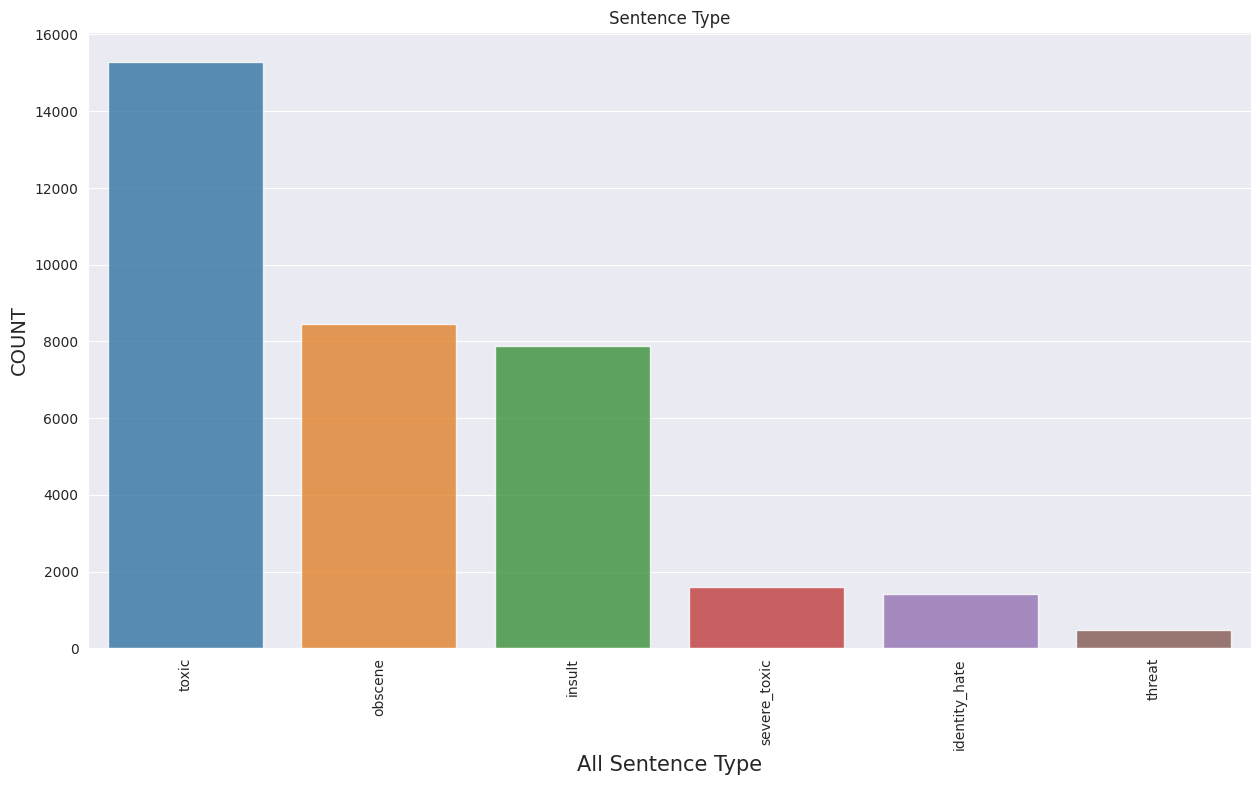

In [17]:
sns.set_style('darkgrid')
ls=sentencetype_graph.sort_values(ascending=False)

plt.figure(figsize=(15,8))

temp = sns.barplot(x=ls.index, y=ls.values, alpha=0.8)

plt.title('Sentence Type')

plt.ylabel('COUNT', fontsize=14)

plt.xlabel('All Sentence Type', fontsize = 15)

temp.set_xticklabels(rotation=90, labels=ls.index, fontsize=10)

In [18]:
# there many toxic sentences followed by obscene sentences and very few thretening sentences as seen above 

In [19]:
import re
import string

In [20]:
# Removing special character
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ',x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_n = lambda x:re.sub('\n', ' ', x)
remove_non_ascii = lambda x:re.sub(r'[^\x00-\x7f]', r' ', x)
dd = df['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [21]:
insulting_comment_df = df.loc[:,['id','comment_text','insult']]
insulting_comment_df.head(2)

,id,comment_text,insult
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0


In [22]:
identityhate_comment_df=df.loc[:,['id','comment_text','identity_hate']]
identityhate_comment_df.sample(2)

,id,comment_text,identity_hate
157505,df617ec32d45a979,"""\n\nYou're taking this whole thing too far. T...",0
43799,74e69d33db8ed495,What games? What pain? I'm simply stating tha...,0


In [23]:
obscene_comment_df = df.loc[:, ['id','comment_text','obscene']]
obscene_comment_df.sample(2)

,id,comment_text,obscene
57049,987f8bfa41004975,C. Fred THANKS SO SO MUCH.\nI WILL ADD MORE RE...,0
11653,1ec6a6c77f357f22,Sorry about the late reply. I'll see what I ca...,0


In [24]:
threetening_comment_df = df.loc[:, ['id','comment_text','threat']]
threetening_comment_df.sample(2)

,id,comment_text,threat
122467,8f1b623c6855d76b,Wait until sources start calling it a war. We ...,0
132866,c6dd083e29b0fea2,Why is the top 10 in the world university Adel...,0


In [25]:
severetoxic_comment_df = df.loc[:, ['id','comment_text','severe_toxic']]

In [26]:
toxic_comment_df = df.loc[:, ['id','comment_text','toxic']]
toxic_comment_df.sample(2)

,id,comment_text,toxic
44577,771a3831318c4fa9,Be WP:BOLD and do it your self !!! Thanks. —— ...,0
28833,4c6847b4f29f2ce7,To user 'Ted': I AM NOT VANDALIZING THIS PAGE....,0


In [27]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [28]:
def wordcloud(df, label):
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc=WordCloud(background_color='black',max_words=2000)
    
    wc.generate(' '.join(text))
    
    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis('off')
    plt.title(f'word frequented in {label}', fontsize=20)
    
    plt.imshow(wc.recolor(colormap='gist_earth', random_state=244), alpha=0.98)
    
    

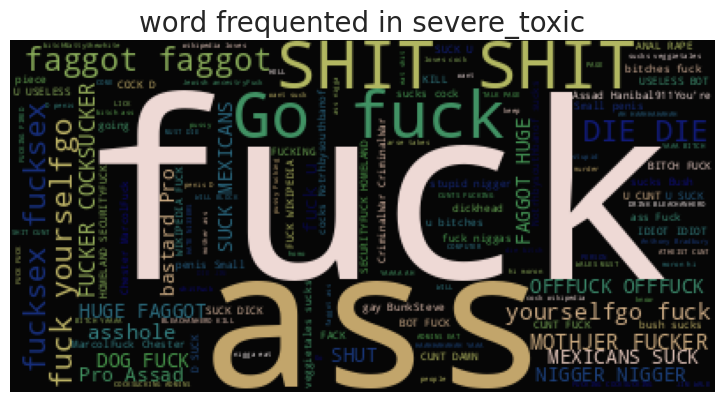

In [29]:
wordcloud(severetoxic_comment_df, 'severe_toxic')

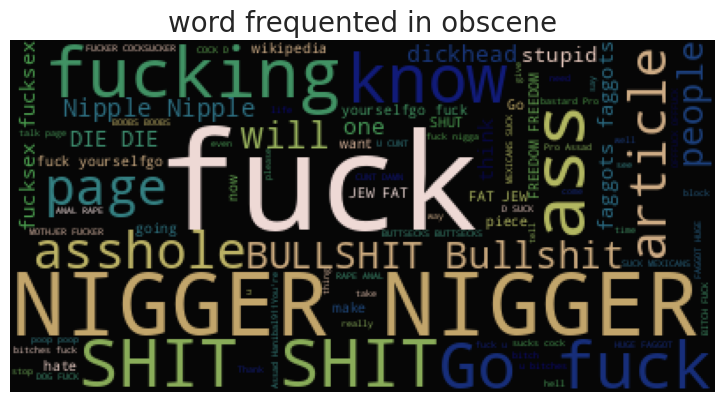

In [30]:
wordcloud(obscene_comment_df, 'obscene')

In [31]:
# Belancing the target column in the dataset

In [32]:
toxic_comment_df

,id,comment_text,toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0
...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0


In [33]:
# Slecting only 5000 toxic comments
toxic_comment_balanced_1 = toxic_comment_df[toxic_comment_df['toxic'] == 1].iloc[0:5000, :]
len(toxic_comment_balanced_1)

5000

In [34]:
# Selectiong only 50000 non toxic comment 
toxic_comment_balanced_0 = toxic_comment_df[toxic_comment_df['toxic'] == 0].iloc[0:5000, :]
toxic_comment_balanced_0.shape

(5000, 3)

In [35]:
# Concating toxic commment and non toxic comment 
toxic_comment_balanced = pd.concat([toxic_comment_balanced_1, toxic_comment_balanced_0])

In [36]:
toxic_comment_balanced.shape

(10000, 3)

In [37]:
toxic_comment_balanced['toxic'].value_counts()
# now the toxic and non toxic is balance

toxic
1    5000
0    5000
Name: count, dtype: int64

In [38]:
# Repeating the steps for the subset dataset

In [39]:
severetoxic_comment_df.sample(2)

,id,comment_text,severe_toxic
158488,eea183eff85f7804,". Because the first is archived, it may be bet...",0
57368,9966e2e5b2b5c372,Seriously? SERIOUSLY!!!??? \n\nIT'S TOO LONG! ...,0


In [40]:
severetoxic_comment_df['severe_toxic'].value_counts()

severe_toxic
0    157976
1      1595
Name: count, dtype: int64

In [41]:
severe_comment_balanced_1 = severetoxic_comment_df[severetoxic_comment_df['severe_toxic'] == 1].iloc[0:1595, :]

In [42]:
severe_comment_balanced_0 = severetoxic_comment_df[severetoxic_comment_df['severe_toxic'] == 0].iloc[0:1595, :]

In [43]:
severe_comment_balanced = pd.concat([severe_comment_balanced_1, severe_comment_balanced_0])
severe_comment_balanced_0.shape, severe_comment_balanced_1.shape,severe_comment_balanced.shape

((1595, 3), (1595, 3), (3190, 3))

In [44]:
# Repeating the same for obsene comment 

In [45]:
obscene_comment_df.sample(2)

,id,comment_text,obscene
66685,b270c7bf84b4c75e,"""\n\n Letter to the Governing Body on controve...",0
113939,6163576bda45f298,"""\nYou may take my word for it that it is. and...",0


In [46]:
obscene_comment_df['obscene'].value_counts()
# There inbalance data

obscene
0    151122
1      8449
Name: count, dtype: int64

In [47]:
obscene_comment_df_1 = obscene_comment_df[obscene_comment_df['obscene'] == 1].iloc[0:8449, :]

In [48]:
obscene_comment_df_0 = obscene_comment_df[obscene_comment_df['obscene'] == 0].iloc[0:8449, :]

In [49]:
obscene_comment_balanced = pd.concat([obscene_comment_df_1, obscene_comment_df_0])
obscene_comment_df_1.shape,  obscene_comment_df_0.shape, obscene_comment_df.shape

((8449, 3), (8449, 3), (159571, 3))

In [50]:
# Repeating the same for thereatening comment

In [51]:
threetening_comment_df.sample(2)

,id,comment_text,threat
125645,a023bfc11d428a36,""", 21 July 2015 (UTC)\n Sure. So in this part...",0
114586,64d66982dd883141,Thank you for recognizing me!,0


In [52]:
threetening_comment_df['threat'].value_counts()
# There inbalance data

threat
0    159093
1       478
Name: count, dtype: int64

In [53]:
threat_comment_df_1 = threetening_comment_df[threetening_comment_df['threat'] == 1].iloc[0:478, :]

In [54]:
threat_comment_df_0 = threetening_comment_df[threetening_comment_df['threat'] == 0].iloc[0:478, :]

In [55]:
threetening_comment_balanced = pd.concat([threat_comment_df_1, threat_comment_df_0])
threat_comment_df_1.shape,  threat_comment_df_1.shape, threetening_comment_balanced.shape

((478, 3), (478, 3), (956, 3))

In [56]:
# Repeating the same for identity hate comment

In [57]:
identityhate_comment_df.sample(2)

,id,comment_text,identity_hate
60437,a1c77452024b9181,"Spadework\nHi there again, please let me know ...",0
124082,97a5d08553a152fb,"""\n\nAn entry from appeared on Wikipedia's Ma...",0


In [58]:
identityhate_comment_df['identity_hate'].value_counts()
# There inbalance data

identity_hate
0    158166
1      1405
Name: count, dtype: int64

In [59]:
identityhate_comment_df_1 = identityhate_comment_df[identityhate_comment_df['identity_hate'] == 1].iloc[0:1405, :]

In [60]:
identityhate_comment_df_0 = identityhate_comment_df[identityhate_comment_df['identity_hate'] == 0].iloc[0:1405, :]

In [61]:
identityhate_comment_balanced = pd.concat([identityhate_comment_df_1, identityhate_comment_df_0])
identityhate_comment_df_1.shape, identityhate_comment_df_0.shape, identityhate_comment_balanced.shape

((1405, 3), (1405, 3), (2810, 3))

In [62]:
# Repeating the same for insult hate comment

In [63]:
insulting_comment_df['insult'].value_counts()

insult
0    151694
1      7877
Name: count, dtype: int64

In [64]:
insulting_comment_df_1 = insulting_comment_df[insulting_comment_df['insult'] == 1].iloc[0:7877, :]

In [65]:
insulting_comment_df_0 = insulting_comment_df[insulting_comment_df['insult'] == 0].iloc[0:7877, :]

In [66]:
insulting_comment_balanced = pd.concat([insulting_comment_df_1, insulting_comment_df_0])
insulting_comment_df_1.shape, insulting_comment_df_0.shape, insulting_comment_balanced.shape

((7877, 3), (7877, 3), (15754, 3))

In [67]:
# Machine Learning

In [68]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import ngrams, bigrams, trigrams

In [69]:
def cv_tf_train_test(dataframe, label, vectorizer, ngram):
    # split the data into X and y datasets
    X = dataframe.comment_text
    y = dataframe[label]
    
    # Split our data into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=50)
    
    # Using vectorize and removing stopwords
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    
    # transforming x-traian and x-test
    X_train_cv1 = cv1.fit_transform(X_train)
    X_test_cv1 = cv1.transform(X_test)
    
    # Machine learning models
    
    ## Logistic regression
    lr = LogisticRegression()
    lr.fit(X_train_cv1, y_train)
    
    ## K-nearest neightbours
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1, y_train)
    
    ## Naive Bayes
    bnb = BernoulliNB()
    bnb.fit(X_train_cv1, y_train)
    
    ## Multinomial Naice bayes
    mnb = MultinomialNB()
    mnb.fit(X_train_cv1, y_train)
    
    # Support vector machine
    svm_model = LinearSVC()
    svm_model.fit(X_train_cv1, y_train)
    
    # Random Forest
    randomforest = RandomForestClassifier(n_estimators=100, random_state=50)
    randomforest.fit(X_train_cv1, y_train)
    
    f1_score_data = {'F1 score': [f1_score(lr.predict(X_test_cv1), y_test), f1_score(knn.predict(X_test_cv1), y_test),
                                 f1_score(bnb.predict(X_test_cv1), y_test), f1_score(mnb.predict(X_test_cv1), y_test),
                                 f1_score(svm_model.predict(X_test_cv1), y_test), f1_score(randomforest.predict(X_test_cv1), y_test)]}
    
    # Saving f1 score results into a dataframe
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression', 'KNN','BernoulliNB','MultinomialNB','SVM', 'Random Forest'])
    
    return df_f1

In [70]:
# Evaluating model performance using evaluation metrics

In [71]:
severe_toxic_comment_cv = cv_tf_train_test(severe_comment_balanced, 'severe_toxic', TfidfVectorizer, (1,1))

In [72]:
severe_toxic_comment_cv
# LogRegression is the best estimator for severee toxic

,F1 score
Log Regression,0.946004
KNN,0.861836
BernoulliNB,0.789700
MultinomialNB,0.930041
SVM,0.936763
Random Forest,0.923237


In [73]:
obscene_toxic_comment_cv = cv_tf_train_test(obscene_comment_balanced, 'obscene', TfidfVectorizer, (1,1))
obscene_toxic_comment_cv.rename(columns={'F1 score':'F1 score (Obscene)'}, inplace=True) # Change column name
obscene_toxic_comment_cv
# LogRegression is the best estimator for obscene toxic

,F1 score (Obscene)
Log Regression,0.916327
KNN,0.751443
BernoulliNB,0.786767
MultinomialNB,0.898175
SVM,0.930924
Random Forest,0.908311


In [74]:
threetening_toxic_comment_cv = cv_tf_train_test(threetening_comment_balanced, 'threat', TfidfVectorizer, (1,1))
threetening_toxic_comment_cv.rename(columns={'F1 score':'F1 score (threat)'}, inplace=True) # Change column name
threetening_toxic_comment_cv
# MultinomialNB is the best estimator for threeetening comment

,F1 score (threat)
Log Regression,0.905660
KNN,0.865574
BernoulliNB,0.751381
MultinomialNB,0.912281
SVM,0.898876
Random Forest,0.904594


In [75]:
insulting_toxic_comment_cv = cv_tf_train_test(insulting_comment_balanced, 'insult', TfidfVectorizer, (1,1))
insulting_toxic_comment_cv.rename(columns={'F1 score':'F1 score (insult)'}, inplace=True) # Change column name
insulting_toxic_comment_cv
# SVM is the best estimator for insulting comment 

,F1 score (insult)
Log Regression,0.905841
KNN,0.414705
BernoulliNB,0.790218
MultinomialNB,0.899832
SVM,0.908157
Random Forest,0.890742


In [76]:
identityhate_toxic_comment_cv = cv_tf_train_test(identityhate_comment_balanced, 'identity_hate', TfidfVectorizer, (1,1))
identityhate_toxic_comment_cv.rename(columns={'F1 score':'F1 score (identity_hate)'}, inplace=True) # Change column name
identityhate_toxic_comment_cv
# LogRegression is the best estimator for identity hate 

,F1 score (identity_hate)
Log Regression,0.907063
KNN,0.825766
BernoulliNB,0.774879
MultinomialNB,0.902238
SVM,0.900857
Random Forest,0.865604


In [77]:
toxic_comment_balanced

,id,comment_text,toxic
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1
...,...,...,...
5544,0ece9249484eddb9,Electronic Intifada is not an activist site! W...,0
5545,0ece971b58a3def7,New Genre \n\nThe New genre supernatural was u...,0
5547,0ecf7cde3391615b,— translated as The Second Vatican Council: A ...,0
5549,0ed11396420e8531,Purpose\nThis RfC will be used to determine co...,0


In [78]:
X = toxic_comment_balanced.comment_text
y = toxic_comment_balanced['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tfv = TfidfVectorizer(ngram_range=(1,1), stop_words=['english'] )

X_train_fit = tfv.fit_transform(X_train)
X_test_fit = tfv.transform(X_test)

randomforest = RandomForestClassifier(n_estimators=100, random_state=50)

randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)

array([0, 1, 1, ..., 1, 0, 1])

In [79]:
# Testing the model to check if the given text is toxic or not

In [80]:
comment_1 = ['i killed an insect and ate it']
comment_1_vec = tfv.transform(comment_1)
randomforest.predict_proba(comment_1_vec)
# As seen below the above comment as 58% toxic

array([[0.42, 0.58]])

In [81]:
comment_2 = ['iis this sentence a good one']
comment_2_vec = tfv.transform(comment_2)
randomforest.predict_proba(comment_2_vec)
# As seen below the above comment as 58% not toxic

array([[0.58, 0.42]])

In [82]:
comment_3 = ['truth will prevail']
comment_3_vec = tfv.transform(comment_3)
randomforest.predict_proba(comment_3_vec)
# As seen below the above comment as 69% toxic

array([[0.31, 0.69]])

Kesimpulan : 
*     LogRegression is the best estimator for severee toxic
*     LogRegression is the best estimator for obscene toxic
*     MultinomialNB is the best estimator for threeetening comment
*     SVM is the best estimator for insulting comment
*     LogRegression is the best estimator for identity hate 